In [1]:
import sys
sys.path.append('../../ML/')

import os
model_folder_path = f'./models'
if not os.path.isdir(model_folder_path):
    os.mkdir(model_folder_path)

# Preprocessing

In [2]:
import pandas as pd
from preprocessing import clean, readData

years = [2018+x for x in range(5)]
location = '臺中'
df = readData(years, location=location)
df = clean(df) # clean df, e.g., nan handling, rename columns, ...
df

,EggPrice,DuckEggPrice,NumRuChung,NumOfChickLayingEggs,BoxesOfEggsPerDay,NumDisuse,NumMoulting,WhiteChickQuantity,RedChickQuantity,ImportChickenQuantity,Corn,SoyBeanFlour,CornFlour,DehulledBeanFlour,HighProteinBeanFlour,AirTemperatureMean,AirTemperatureMax,Precipitation
Date,,,,,,,,,,,,,,,,,,
2018-01-01,24.5,34.0,1160830.0,31170982.0,114908.0,866824.0,633700.0,245600,84800,0.0,6.10,12.15,6.65,13.3,13.21,17.3,27.2,0.0
2018-01-02,24.5,34.0,1160830.0,31170982.0,114908.0,866824.0,633700.0,245600,84800,0.0,6.10,12.15,6.65,13.3,13.21,17.3,27.2,0.0
2018-01-03,26.5,34.0,1160830.0,31170982.0,114908.0,866824.0,633700.0,245600,84800,0.0,6.10,12.15,6.65,13.3,13.21,17.3,27.2,0.0
2018-01-04,26.5,34.0,1160830.0,31170982.0,114908.0,866824.0,633700.0,245600,84800,0.0,6.10,12.15,6.63,13.3,13.21,17.3,27.2,4.0
2018-01-05,26.5,34.0,1160830.0,31170982.0,114908.0,866824.0,633700.0,245600,84800,0.0,6.10,12.15,6.63,13.3,13.20,17.3,27.2,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,40.5,43.0,1592549.0,35037318.0,122636.0,1203140.0,990135.0,387890,83670,0.0,10.85,19.90,11.60,21.1,21.00,17.8,28.1,0.0
2022-12-28,40.5,43.0,1592549.0,35037318.0,122636.0,1203140.0,990135.0,387890,83670,0.0,11.05,19.90,11.68,21.1,21.00,17.8,28.1,0.0
2022-12-29,40.5,43.0,1592549.0,35037318.0,122636.0,1203140.0,990135.0,353700,91500,0.0,11.05,19.90,11.78,21.1,21.00,17.8,28.1,0.0


# Feature Selection

Number of selected features: 7 

Highly relative feature list:
DuckEggPrice            0.726912
NumRuChung              0.435494
Corn                    0.592012
SoyBeanFlour            0.635711
CornFlour               0.620423
DehulledBeanFlour       0.547041
HighProteinBeanFlour    0.639172
Name: EggPrice, dtype: float64


,DuckEggPrice,NumRuChung,Corn,SoyBeanFlour,CornFlour,DehulledBeanFlour,HighProteinBeanFlour,EggPrice
Date,,,,,,,,
2018-01-01,34.0,1160830.0,6.10,12.15,6.65,13.3,13.21,24.5
2018-01-02,34.0,1160830.0,6.10,12.15,6.65,13.3,13.21,24.5
2018-01-03,34.0,1160830.0,6.10,12.15,6.65,13.3,13.21,26.5
2018-01-04,34.0,1160830.0,6.10,12.15,6.63,13.3,13.21,26.5
2018-01-05,34.0,1160830.0,6.10,12.15,6.63,13.3,13.20,26.5
...,...,...,...,...,...,...,...,...
2022-12-27,43.0,1592549.0,10.85,19.90,11.60,21.1,21.00,40.5
2022-12-28,43.0,1592549.0,11.05,19.90,11.68,21.1,21.00,40.5
2022-12-29,43.0,1592549.0,11.05,19.90,11.78,21.1,21.00,40.5


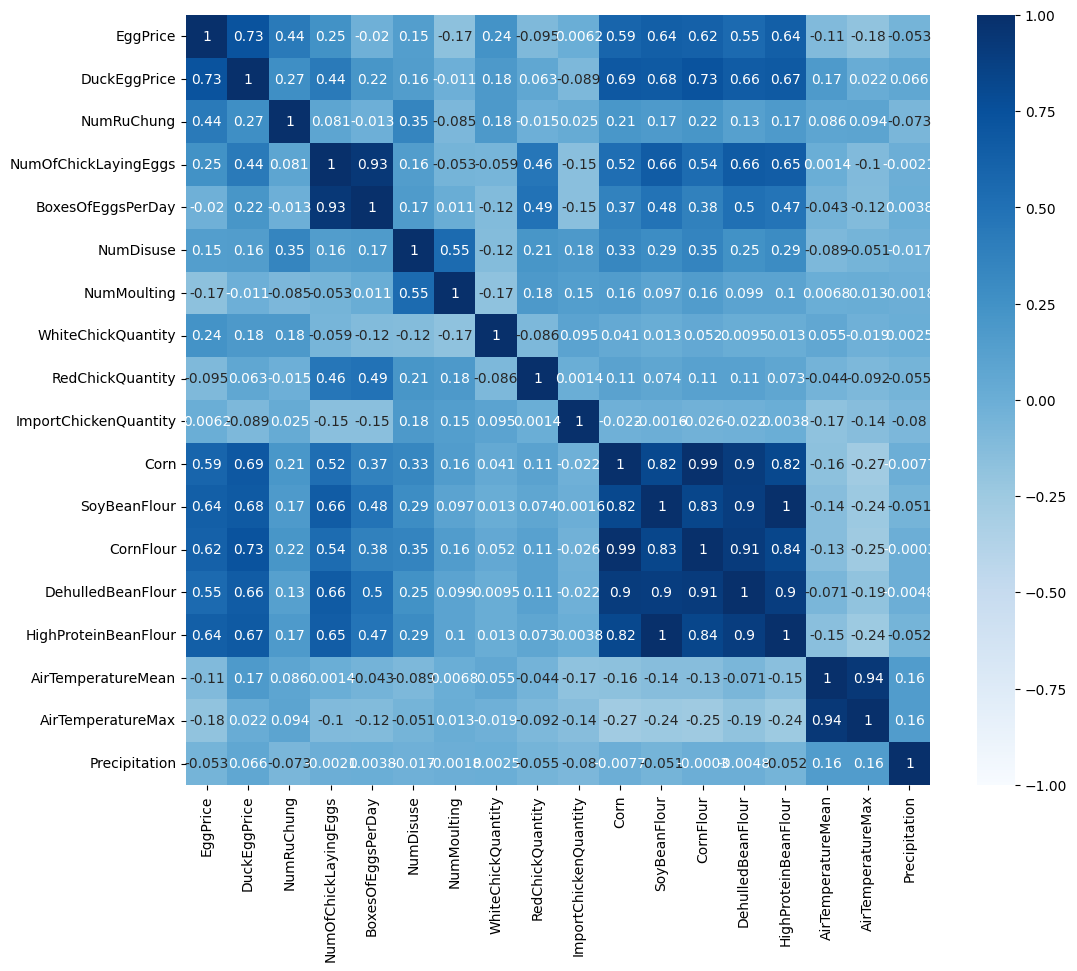

In [3]:
from preprocessing import feature_selection

df, selectedFeatures, targetCorr = feature_selection(df, type='corr')
df

# Train and test by many conditions

/Users/huangrongzun/Desktop/112-1-SLDL-Final-EggPricePrediction/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-12-10 16:31:36,351] A new study created in memory with name: no-name-4848d042-832c-4510-bd5d-664ca966e693
/Users/huangrongzun/Desktop/112-1-SLDL-Final-EggPricePrediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.442e+03, tolerance: 5.635e+00
  model = cd_fast.enet_coordinate_descent(



 ================================== Year used for prediction: 2018 ================================== 


 #################### 2018-LassoRegressor #################### 

Mean Squared Error: 14.265609854140939
Root Mean Squared Error: 3.7769842274149013
Mean Squared Percentage Error: 1.5117274644459733%


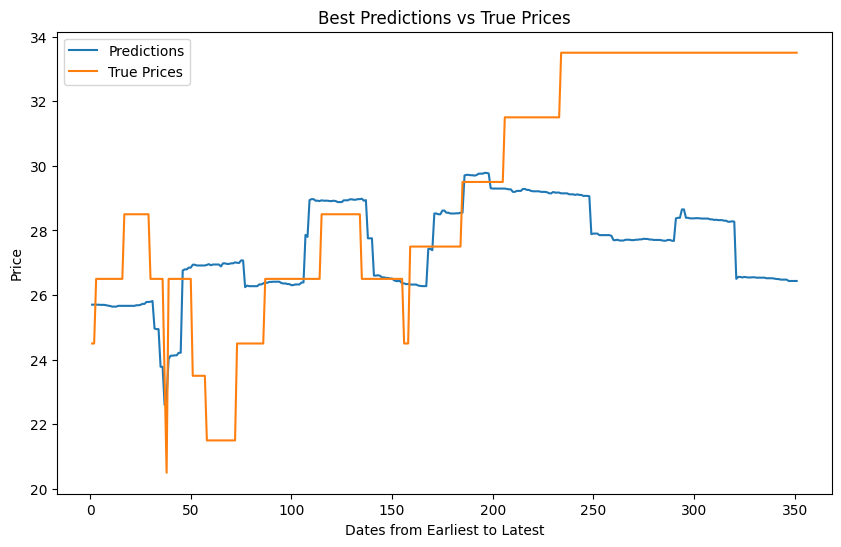


 #################### 2018-RidgeRegressor #################### 

Mean Squared Error: 19.87431397132872
Root Mean Squared Error: 4.45806168321264
Mean Squared Percentage Error: 2.062846847981249%


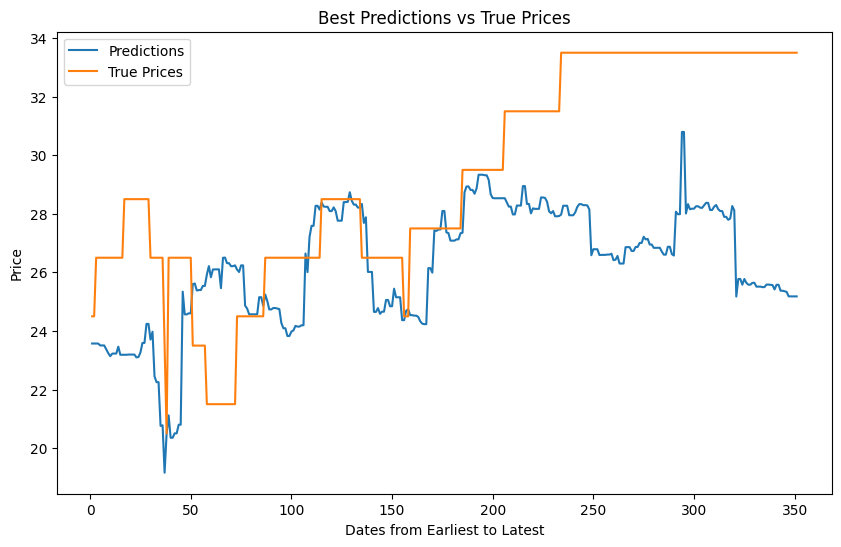

,Model,MSE,RMSE,MSPE
0,LassoRegressor,14.265610,3.776984,1.511727
1,RidgeRegressor,19.874314,4.458062,2.062847



 ================================== Year used for prediction: 2019 ================================== 



/Users/huangrongzun/Desktop/112-1-SLDL-Final-EggPricePrediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.440e+02, tolerance: 5.273e+00
  model = cd_fast.enet_coordinate_descent(



 #################### 2019-LassoRegressor #################### 

Mean Squared Error: 30.856988014523047
Root Mean Squared Error: 5.554906661189101
Mean Squared Percentage Error: 4.6096985315923895%


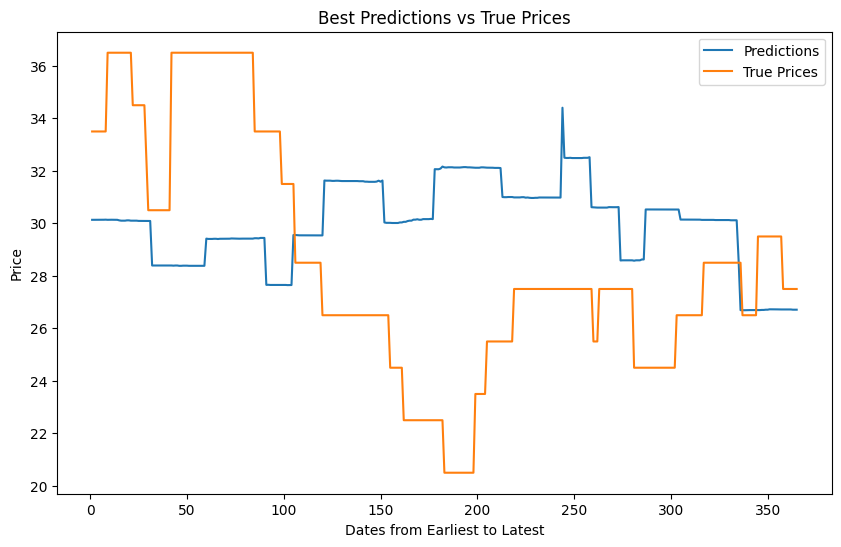


 #################### 2019-RidgeRegressor #################### 

Mean Squared Error: 33.55519934592112
Root Mean Squared Error: 5.792684985904302
Mean Squared Percentage Error: 5.363498570275813%


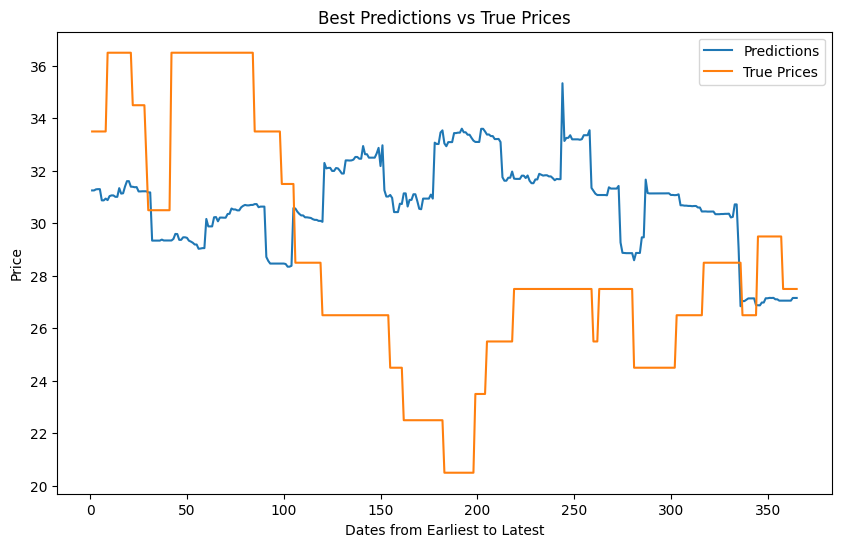

,Model,MSE,RMSE,MSPE
0,LassoRegressor,30.856988,5.554907,4.609699
1,RidgeRegressor,33.555199,5.792685,5.363499



 ================================== Year used for prediction: 2020 ================================== 



/Users/huangrongzun/Desktop/112-1-SLDL-Final-EggPricePrediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.250e+01, tolerance: 5.163e+00
  model = cd_fast.enet_coordinate_descent(
/Users/huangrongzun/Desktop/112-1-SLDL-Final-EggPricePrediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.228e+03, tolerance: 5.163e+00
  model = cd_fast.enet_coordinate_descent(
/Users/huangrongzun/Desktop/112-1-SLDL-Final-EggPricePrediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did no


 #################### 2020-LassoRegressor #################### 

Mean Squared Error: 9.909395115266305
Root Mean Squared Error: 3.147919172289261
Mean Squared Percentage Error: 1.7263255404006725%


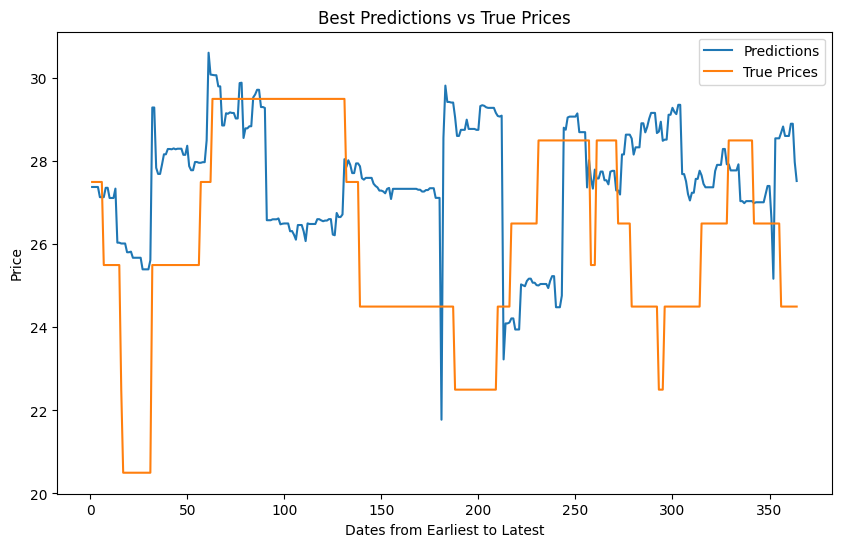


 #################### 2020-RidgeRegressor #################### 

Mean Squared Error: 9.724767508428878
Root Mean Squared Error: 3.1184559494129265
Mean Squared Percentage Error: 1.6843143854630835%


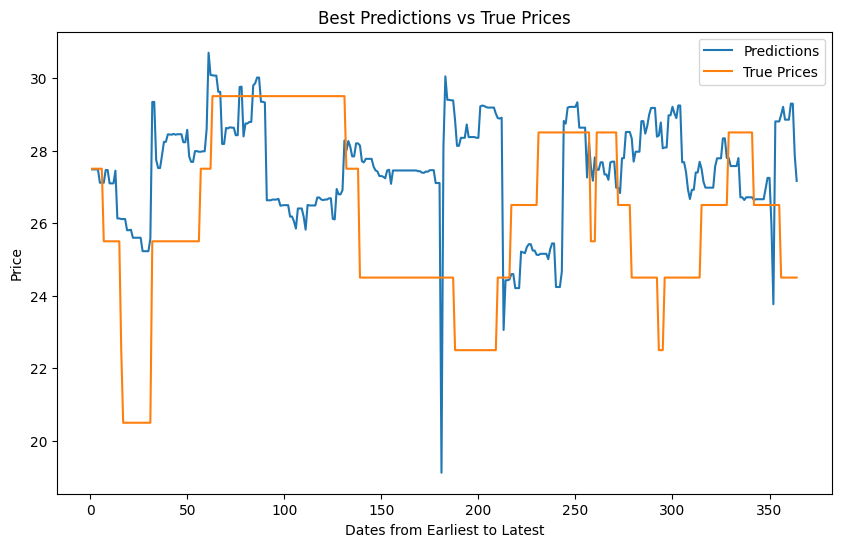

,Model,MSE,RMSE,MSPE
0,LassoRegressor,9.909395,3.147919,1.726326
1,RidgeRegressor,9.724768,3.118456,1.684314



 ================================== Year used for prediction: 2021 ================================== 



/Users/huangrongzun/Desktop/112-1-SLDL-Final-EggPricePrediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.274e+03, tolerance: 5.525e+00
  model = cd_fast.enet_coordinate_descent(
/Users/huangrongzun/Desktop/112-1-SLDL-Final-EggPricePrediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.852e+03, tolerance: 5.525e+00
  model = cd_fast.enet_coordinate_descent(
/Users/huangrongzun/Desktop/112-1-SLDL-Final-EggPricePrediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did no


 #################### 2021-LassoRegressor #################### 

Mean Squared Error: 19.899499980109677
Root Mean Squared Error: 4.460885560077694
Mean Squared Percentage Error: 3.177005532676949%


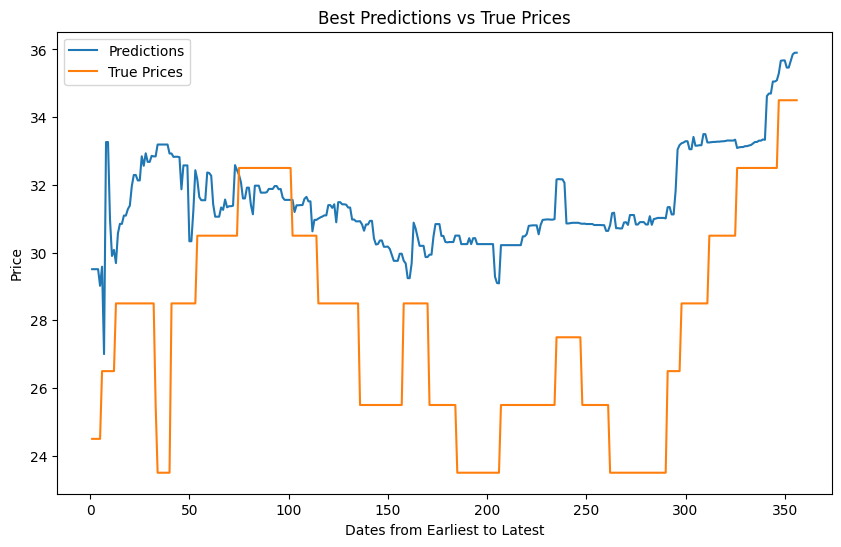


 #################### 2021-RidgeRegressor #################### 

Mean Squared Error: 19.43205534286847
Root Mean Squared Error: 4.408180502528052
Mean Squared Percentage Error: 3.095521790451602%


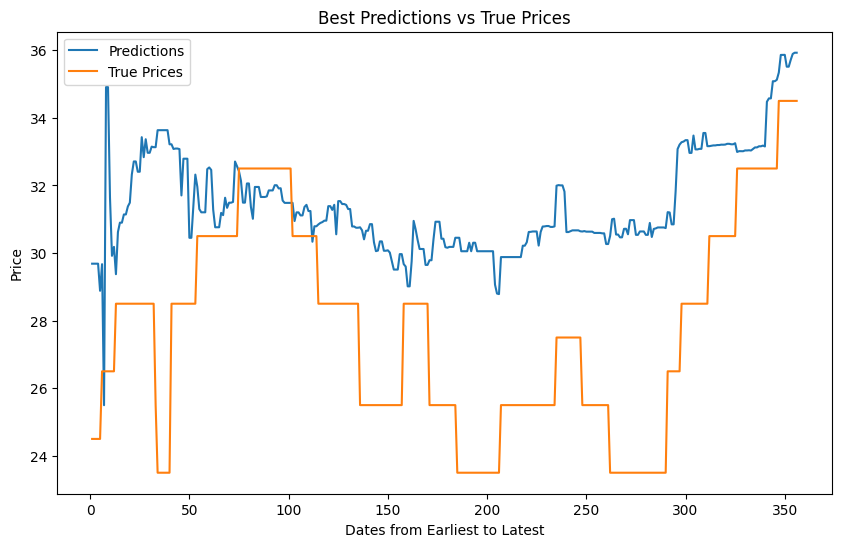

,Model,MSE,RMSE,MSPE
0,LassoRegressor,19.899500,4.460886,3.177006
1,RidgeRegressor,19.432055,4.408181,3.095522



 ================================== Year used for prediction: 2022 ================================== 



/Users/huangrongzun/Desktop/112-1-SLDL-Final-EggPricePrediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.517e+01, tolerance: 1.956e+00
  model = cd_fast.enet_coordinate_descent(
/Users/huangrongzun/Desktop/112-1-SLDL-Final-EggPricePrediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.704e+03, tolerance: 1.956e+00
  model = cd_fast.enet_coordinate_descent(
/Users/huangrongzun/Desktop/112-1-SLDL-Final-EggPricePrediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did no


 #################### 2022-LassoRegressor #################### 

Mean Squared Error: 72.49587600348013
Root Mean Squared Error: 8.514451010105121
Mean Squared Percentage Error: 4.371243774833112%


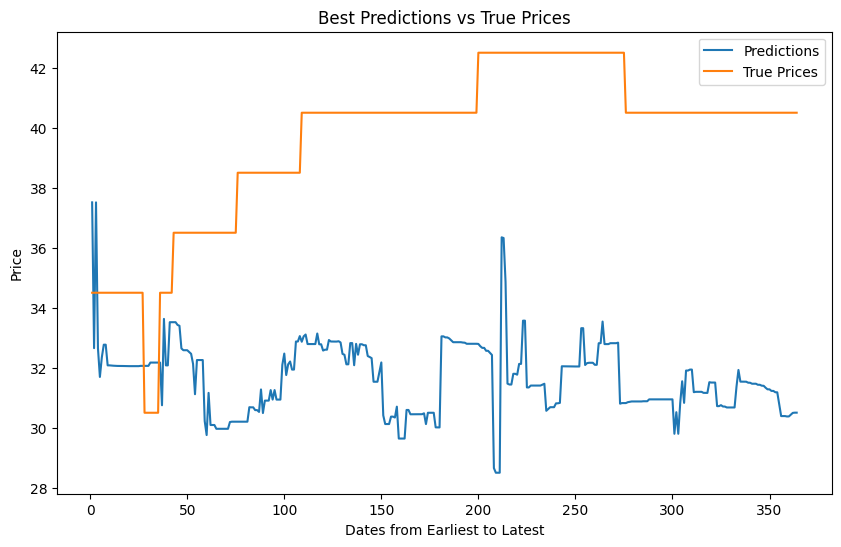


 #################### 2022-RidgeRegressor #################### 

Mean Squared Error: 72.20395355062016
Root Mean Squared Error: 8.497290953628701
Mean Squared Percentage Error: 4.351402199993778%


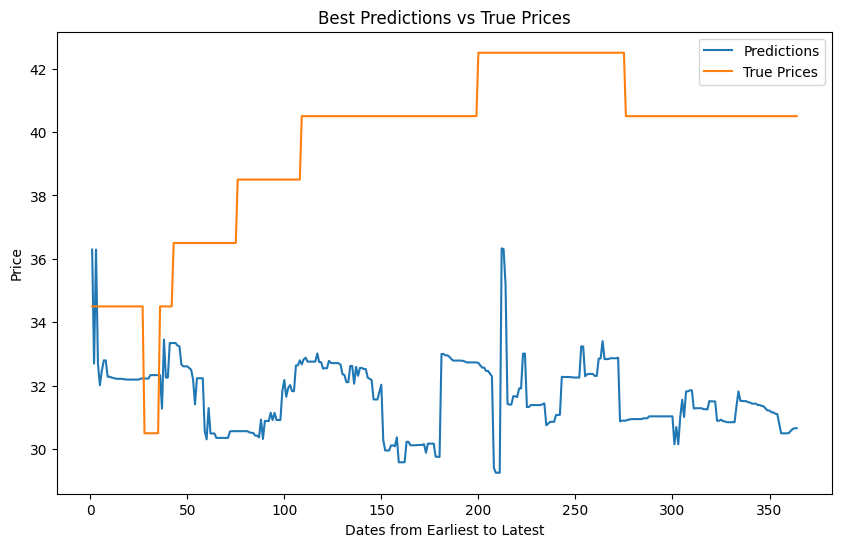

,Model,MSE,RMSE,MSPE
0,LassoRegressor,72.495876,8.514451,4.371244
1,RidgeRegressor,72.203954,8.497291,4.351402


In [4]:
import joblib
import optuna
from sklearn.linear_model import Lasso, Ridge
from preprocessing import split_and_scale
from training import train, evaluate, save_model

def train_and_evaluate(model, X_train, y_train):
    model_trained = train(model, X_train, y_train)
    mse, rmse, mspe = evaluate(model_trained, X_test, y_test)
    return rmse  # You can choose to minimize or maximize this metric based on your needs

def objective_lasso(trial):
    alpha = trial.suggest_float('alpha', 0.001, 1.0)
    
    lasso_regressor = Lasso(alpha=alpha, random_state=42)
    
    return train_and_evaluate(lasso_regressor, X_train, y_train)

def objective_ridge(trial):
    alpha = trial.suggest_float('alpha', 0.001, 1.0)
    
    ridge_regressor = Ridge(alpha=alpha, random_state=42)
    
    return train_and_evaluate(ridge_regressor, X_train, y_train)


for year in years:
    model_year_folder_path = f'{model_folder_path}/{year}'
    if not os.path.isdir(model_year_folder_path):
        os.mkdir(model_year_folder_path)

    print(f"\n ================================== Year used for prediction: {year} ================================== \n")
    X_train, X_test, y_train, y_test = split_and_scale(df, year_to_predict=year)

    # Lasso regressor
    study_lasso = optuna.create_study(direction='minimize')
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study_lasso.optimize(objective_lasso, n_trials=50)
    best_params_lasso = study_lasso.best_params

    lasso_regressor = Lasso(random_state=42, **best_params_lasso)
    lasso_regressor_trained = train(lasso_regressor, X_train, y_train)
    save_model(year, lasso_regressor_trained, "LassoRegressor")

    # Ridge regressor
    study_ridge = optuna.create_study(direction='minimize')
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study_ridge.optimize(objective_ridge, n_trials=50)
    best_params_ridge = study_ridge.best_params

    ridge_regressor = Ridge(random_state=42, **best_params_ridge)
    ridge_regressor_trained = train(ridge_regressor, X_train, y_train)
    save_model(year, ridge_regressor_trained, "RidgeRegressor")


    # Create a list of models and their names
    models = [
        {'name':"LassoRegressor", 'model':lasso_regressor_trained},
        {'name':"RidgeRegressor", 'model':ridge_regressor_trained},
        # Add other models as needed
    ]

    # Loop through each model, train, evaluate, and store the results in the DataFrame
    results_list = []
    for model in models:
        print(f"\n #################### {year}-{model['name']} #################### \n")
        model_to_eval = joblib.load(f"{model_year_folder_path}/{model['name']}.joblib")
        mse, rmse, mspe = evaluate(model_to_eval, X_test, y_test, show_best=True)

        results_list.append({"Model": model['name'], "MSE": mse, "RMSE": rmse, "MSPE": mspe})
        
    # Print or save the DataFrame
    results_df = pd.DataFrame(results_list)
    display(results_df)

